In [13]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist
import PIL
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
from keras.backend import categorical_crossentropy

In [14]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

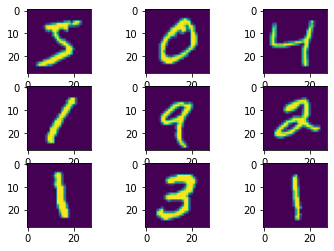

In [3]:
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()

In [15]:
x = x_test
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

In [16]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [17]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same',input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

In [18]:
model.add(Flatten())

In [19]:
model.add(Dense(128, activation = 'relu', kernel_initializer = 'he_uniform',input_shape=(28,28)))
model.add(Dropout(0.2))
model.add(Dense(10,activation='relu'))
model.add(Dropout(0.1))

In [20]:
model.add(Dense(10, activation = 'softmax'))

In [21]:

opt = SGD(lr = 0.01, momentum = 0.9)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [22]:

model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [23]:
history = model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_test, y_test))

Epoch 1/10
469/469 [==============================] - 12s 24ms/step - loss: 0.4586 - accuracy: 0.8518 - val_loss: 0.0962 - val_accuracy: 0.9747
Epoch 2/10
469/469 [==============================] - 10s 21ms/step - loss: 0.1785 - accuracy: 0.9504 - val_loss: 0.0655 - val_accuracy: 0.9807
Epoch 3/10
469/469 [==============================] - 11s 22ms/step - loss: 0.1378 - accuracy: 0.9642 - val_loss: 0.0604 - val_accuracy: 0.9814
Epoch 4/10
469/469 [==============================] - 11s 23ms/step - loss: 0.1138 - accuracy: 0.9689 - val_loss: 0.0507 - val_accuracy: 0.9868
Epoch 5/10
469/469 [==============================] - 12s 25ms/step - loss: 0.0977 - accuracy: 0.9738 - val_loss: 0.0572 - val_accuracy: 0.9843
Epoch 6/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0854 - accuracy: 0.9782 - val_loss: 0.0450 - val_accuracy: 0.9873
Epoch 7/10
469/469 [==============================] - 10s 21ms/step - loss: 0.0728 - accuracy: 0.9808 - val_loss: 0.0450 - val_accuracy:

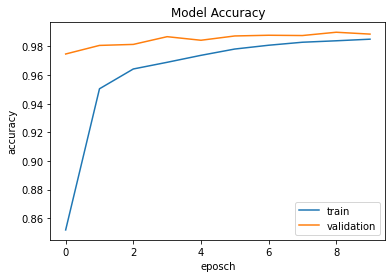

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('eposch')
plt.legend(['train','validation'], loc = 'lower right')

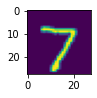

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


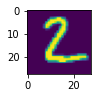

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


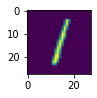

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


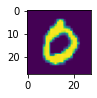

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


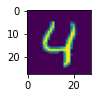

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


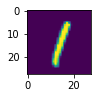

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


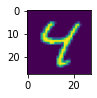

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


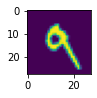

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


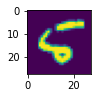

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [26]:
y_pred=model.predict(x_test)
for i in range(9):
  plt.subplot(330+i+1) 
  plt.imshow(x[i])
  plt.show()
  print(np.round(y_pred[i]))